In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/bs.csv")
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [14]:
Q1 = df.amount.quantile(0.25)
Q3 = df.amount.quantile(0.75)
IQR = Q3-Q1

#conditions = [(df.amount > (Q3+1.5*IQR)), (df.amount < (Q1-1.5*IQR)), (df.amount < (Q3+1.5*IQR)) | (df.amount > (Q1+1.5*IQR))]
conditions = [(df.amount > (Q3+1.5*IQR)), (df.amount < (Q3+1.5*IQR))]
#values = [1, 1, 0]
values = [1, 0]
df["IQR_outlier"] = np.select(conditions, values)
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,IQR_outlier
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0,0


In [40]:
lowerBound = Q1 - 1.5*IQR
upperBound = Q3 + 1.5*IQR
print("The lower outlier bound for amount is: ", lowerBound) # non-existant
print("The upper outlier bound for amount is: ", upperBound)

The lower outlier bound for amount is:  -29.459999999999994
The upper outlier bound for amount is:  85.74


In [42]:
df[df.amount > 85.74].shape

(25798, 13)

([<matplotlib.axis.XTick at 0x1d59d630040>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

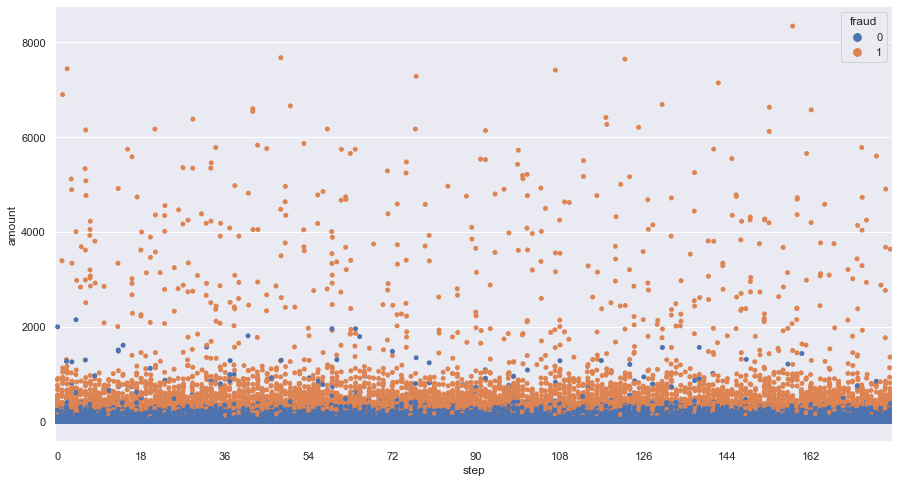

In [41]:
sns.set(rc = {'figure.figsize':(15,8)})
graph = sns.stripplot(data=df, x="step", y="amount", hue="fraud")
graph.axhline(Q3 + 1.5*IQR, color = 'r')
plt.xticks(np.arange(0, 180, 18))
plt.show()

In [18]:
mean = df["amount"].mean()
std = np.std(df["amount"])
print('mean of the dataset is', mean)
print('std. deviation is', std)

threshold = 1.5
outlier = []
for i in df["amount"]:
    z = (i-mean)/std
    if abs(z) > threshold:
        outlier.append(i)
print('The number of outliers in the dataset is', len(outlier))


mean of the dataset is 37.89013530807561
std. deviation is 111.40273725877348
The number of outliers in the dataset is 7341


In [19]:
df["z_score"] = (df.amount-mean)/std
conditions = [(df.z_score > 1.5), (df.z_score < (-1.5)), (df.z_score < (1.5)) | (df.z_score > (-1.5))]
values = [1, 1, 0]
df["Z_outlier"] = np.select(conditions, values)
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,IQR_outlier,z_score,Z_outlier
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,0,-0.299276,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,0,0.016067,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,0,-0.098742,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0,0,-0.185275,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0,0,-0.019480,0


In [20]:
df.fraud.value_counts()
df.IQR_outlier.value_counts()
df.Z_outlier.value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

0    568845
1     25798
Name: IQR_outlier, dtype: int64

0    587302
1      7341
Name: Z_outlier, dtype: int64

In [33]:
df.groupby("fraud").category.value_counts()

fraud  category               
0      'es_transportation'        505119
       'es_food'                   26254
       'es_health'                 14437
       'es_wellnessandbeauty'      14368
       'es_fashion'                 6338
       'es_barsandrestaurants'      6253
       'es_hyper'                   5818
       'es_tech'                    2212
       'es_sportsandtoys'           2020
       'es_home'                    1684
       'es_hotelservices'           1196
       'es_contents'                 885
       'es_otherservices'            684
       'es_travel'                   150
       'es_leisure'                   25
1      'es_sportsandtoys'           1982
       'es_health'                  1696
       'es_wellnessandbeauty'        718
       'es_travel'                   578
       'es_hotelservices'            548
       'es_leisure'                  474
       'es_home'                     302
       'es_hyper'                    280
       'es_otherservices' 

In [30]:
mfups = df[df.IQR_outlier != df.fraud]
mfups.groupby("category").fraud.count()

category
'es_barsandrestaurants'     601
'es_contents'               105
'es_fashion'               1750
'es_food'                  1091
'es_health'                7676
'es_home'                   966
'es_hotelservices'          749
'es_hyper'                  499
'es_leisure'                  9
'es_otherservices'          302
'es_sportsandtoys'         1225
'es_tech'                  1099
'es_transportation'         869
'es_travel'                 142
'es_wellnessandbeauty'     3507
Name: fraud, dtype: int64

In [23]:
fups = df[df.Z_outlier != df.fraud]

In [28]:
fups.groupby("category").fraud.count()

category
'es_barsandrestaurants'      87
'es_fashion'                 80
'es_health'                2096
'es_home'                   314
'es_hotelservices'          256
'es_hyper'                  182
'es_leisure'                 63
'es_otherservices'           95
'es_sportsandtoys'          774
'es_tech'                   249
'es_travel'                 142
'es_wellnessandbeauty'      413
Name: fraud, dtype: int64

In [29]:
fups.groupby("category").amount.describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
'es_barsandrestaurants',87.0,97.876897,59.005664,2.37,44.0600,95.160,142.5350,203.28
'es_fashion',80.0,140.061625,76.783754,4.35,62.1925,141.215,211.5425,269.39
'es_health',2096.0,218.509976,84.226430,0.03,205.8175,230.155,265.8600,468.81
'es_home',314.0,228.047484,88.928099,0.19,205.5275,229.510,279.0150,523.11
'es_hotelservices',256.0,159.368789,87.729099,0.41,80.4825,178.150,225.5100,345.87
'es_hyper',182.0,100.178407,61.745284,1.13,45.4700,96.350,159.9400,203.80
'es_leisure',63.0,161.879365,34.562578,45.46,147.3400,170.530,188.6950,202.93
'es_otherservices',95.0,125.645579,71.129121,7.66,65.6300,127.240,189.6050,298.81
'es_sportsandtoys',774.0,119.334457,71.836680,0.42,59.4550,116.925,173.9250,374.46
